In [3]:

import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import numpy as np
import matplotlib.pyplot as plt


TensorFlow version: 2.18.0


In [4]:
# download Dataset MNIST
from tensorflow.keras.datasets import mnist

# download data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("Training set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set: (60000, 28, 28) (60000,)
Test set: (10000, 28, 28) (10000,)


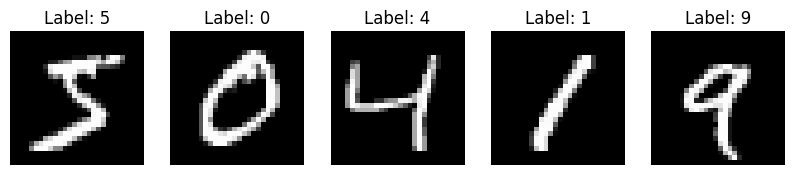

In [5]:
plt.figure(figsize=(10, 2))  # graph size
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [8]:
# to_categorical from keras.utils
from tensorflow.keras.utils import to_categorical


y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

# check size
print("x_train_flat shape:", x_train_flat.shape)
print("y_train_cat shape:", y_train_cat.shape)


x_train_flat shape: (60000, 784)
y_train_cat shape: (60000, 10)


In [9]:
# Import the required layers for the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creating a simple neural network
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # first hidden layer with 128 neurons and ReLU activation
    Dense(10, activation='softmax')                      # output layer for 10 classes (softmax for classification)
])

#  Compile the model (set the optimizer, loss function and metric)
model.compile(
    optimizer='adam',              # optimizator Adam
    loss='categorical_crossentropy', # loss function for multiclass classification
    metrics=['accuracy']            # metric - accuracy
)

# model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 - 8s - 4ms/step - accuracy: 0.7143 - loss: 1.1677 - val_accuracy: 0.8571 - val_loss: 0.5825
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.8737 - loss: 0.4839 - val_accuracy: 0.8945 - val_loss: 0.3983
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.8965 - loss: 0.3788 - val_accuracy: 0.9038 - val_loss: 0.3423
Epoch 4/5
1875/1875 - 5s - 2ms/step - accuracy: 0.9046 - loss: 0.3372 - val_accuracy: 0.9117 - val_loss: 0.3133
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9103 - loss: 0.3135 - val_accuracy: 0.9155 - val_loss: 0.2957


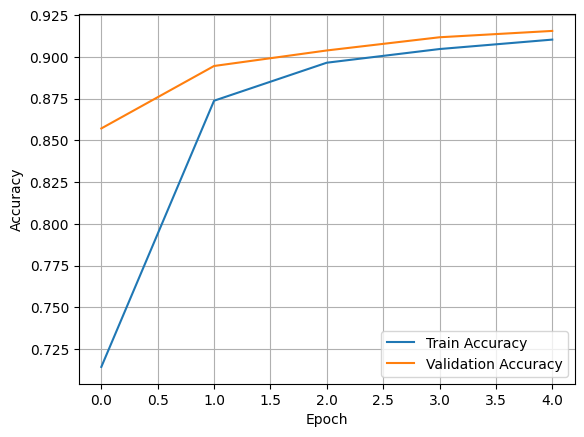

In [10]:
# train model
history = model.fit(
    x_train_flat, y_train_cat,      # train data
    epochs=5,
    batch_size=32,                  # batch size
    validation_data=(x_test_flat, y_test_cat),
    verbose=2
)

#Let's see how the accuracy varied on the training and validation datasetimport matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
#  Evaluate the quality of the model on the test sample
test_loss, test_acc = model.evaluate(x_test_flat, y_test_cat, verbose=2)
print("🧪 Test accuracy:", test_acc)


313/313 - 1s - 2ms/step - accuracy: 0.9155 - loss: 0.2957
🧪 Test accuracy: 0.9154999852180481


In [12]:
#  Predict classes for the first 10 examples from the test sample
import numpy as np

predictions = model.predict(x_test_flat[:10])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test_cat[:10], axis=1)

print("🔮 Predicted classes:", predicted_classes)
print("✅ True classes:", true_classes)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
🔮 Predicted classes: [7 2 1 0 4 1 4 9 6 9]
✅ True classes: [7 2 1 0 4 1 4 9 5 9]


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


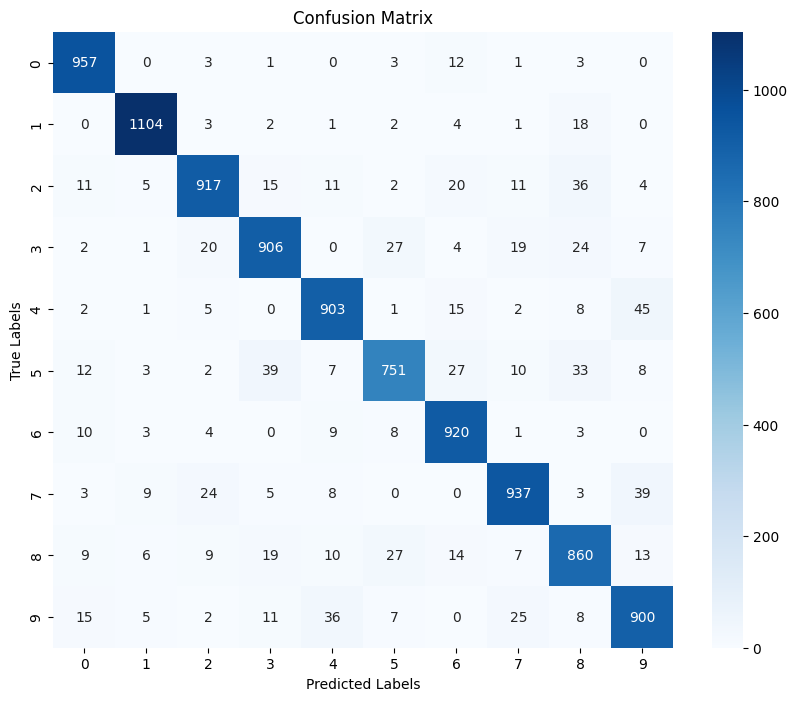

In [13]:
# (confusion matrix)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# prediction test data
y_pred = np.argmax(model.predict(x_test_flat), axis=1)
y_true = np.argmax(y_test_cat, axis=1)

# built confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


In [14]:
# save model
model.save("mnist_mlp_model.h5")

print("✅ Model saved as mnist_mlp_model.h5!")


✅ Model saved as mnist_mlp_model.h5!


In [15]:
# save model in new format
model.save("mnist_mlp_model.keras")

print("✅ Model saved as mnist_mlp_model.keras!")


✅ Model saved as mnist_mlp_model.keras!
